In [8]:
#Our first machine learning model
#Garreta and Moncecchi pp 10-20
#uses Iris database and SGD classifier
import sklearn
print( 'The scikit learn version is {}.'.format(sklearn.__version__))

The scikit learn version is 0.23.1.


In [9]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print( X_iris.shape, y_iris.shape)
#(150, 4) (150,)
print( X_iris[0], y_iris[0])
#[ 5.1  3.5  1.4  0.2] 0

(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Get dataset with only the first two attributes
X, y = X_iris[:, :2], y_iris
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print( X_train.shape, y_train.shape)
#(112, 2) (112,)
# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(112, 2) (112,)


Text(0, 0.5, 'Sepal width')

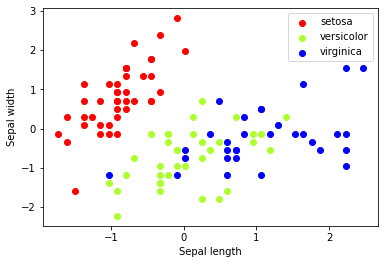

In [11]:
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']
#it doesnt like "xrange" changed to "range"
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [12]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [18]:
print( clf.coef_)
print( clf.intercept_)

[[-25.23761386  12.1597854 ]
 [  5.04091879  -4.52754722]
 [  7.70476535  -3.26694979]]
[-16.74076701 -12.03472148  -2.97293273]


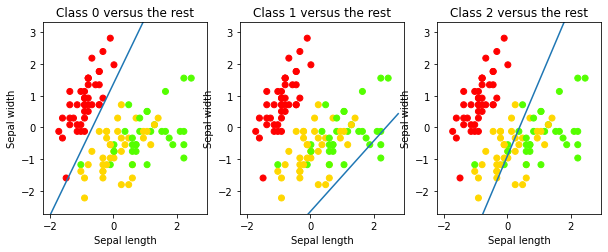

In [22]:
import numpy as np
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

Xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - Xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(Xs, ys)
    


In [23]:
print( clf.predict(scaler.transform([[4.7, 3.1]])) )

[0]


In [24]:
print( clf.decision_function(scaler.transform([[4.7, 3.1]])) )


[[ 16.07339517 -18.7662875  -12.95311258]]


In [25]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )

0.6428571428571429


In [26]:
y_pred = clf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )

0.7105263157894737


In [29]:
print( metrics.classification_report(y_test, y_pred, target_names=iris.target_names) )

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.00      0.00      0.00        11
   virginica       0.63      1.00      0.78        19

    accuracy                           0.71        38
   macro avg       0.54      0.67      0.59        38
weighted avg       0.53      0.71      0.60        38



In [30]:
print( metrics.confusion_matrix(y_test, y_pred) )

[[ 8  0  0]
 [ 0  0 11]
 [ 0  0 19]]


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
# create a composite estimator made by a pipeline of the standarization and the linear model
clf = Pipeline([(
        'scaler', StandardScaler()),
        ('linear_model', SGDClassifier())
])
# create a k-fold cross validation iterator of k=5 folds
cv = KFold(5, shuffle=True, random_state=33)
# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf, X, y, cv=cv)
print( scores )

[0.7        0.76666667 0.76666667 0.93333333 0.73333333]


In [37]:
from scipy.stats import sem
def mean_score(scores): return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print( mean_score(scores) )

Mean score: 0.780 (+/- 0.040)


In [38]:
print("My name is Takumi Li")
print("My NetID is: feiyang3")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Takumi Li
My NetID is: feiyang3
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
